# Data Preprocessing Tools

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Train_Data.csv')

In [3]:
x = dataset.iloc[:179, 2:22].values
#y_real = dataset.iloc[:, -2].values
y_class = dataset.iloc[:179, -1].values

In [4]:
dataset.describe()

,x,y,DFF,DFR,Alititude,Draw_D,Drain_D,LS,Lineam_D,MRVBF,...,Plan_C,TRI,SPI,Slope,TWI,TPI,litho_recl,geomorph_R,WellYield,WellClass
count,208.000000,2.080000e+02,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,271259.545123,2.766981e+06,15.763628,2.879436,298.168269,3.067833,1.863424,0.540355,0.567670,4.200671,...,0.005076,1.019423,92.352994,0.040885,7.751691,0.020054,2.019231,3.879808,2.822452,1.956731
std,32991.423662,4.803321e+04,10.989323,1.920751,83.278159,1.722988,0.819644,0.381257,0.510052,2.025785,...,0.014306,0.540285,102.044752,0.024791,0.945616,0.796296,0.528982,0.651995,4.309827,1.151790
min,217733.343200,2.684480e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.031950,0.000000,0.000000,0.000000,0.000000,-2.018020,1.000000,1.000000,-0.010000,1.000000
25%,245543.343200,2.720817e+06,6.057310,1.368395,231.750000,1.899078,1.254515,0.335202,0.233272,2.477153,...,-0.004618,0.672262,43.056400,0.025315,7.295340,-0.491742,2.000000,4.000000,0.590000,1.000000
50%,259853.343200,2.761880e+06,14.691465,2.670015,307.000000,2.725835,1.735150,0.478565,0.484415,4.491420,...,0.004465,0.956615,68.080150,0.037840,7.665435,-0.109610,2.000000,4.000000,0.890000,1.000000
75%,291938.343200,2.815902e+06,22.969562,3.993440,369.000000,3.980703,2.367587,0.633900,0.789645,5.879145,...,0.014820,1.266533,101.582118,0.049680,8.099013,0.476723,2.000000,4.000000,3.532500,3.000000
max,351293.343200,2.860340e+06,50.570830,8.219930,507.000000,14.297670,4.817490,3.924550,5.041990,7.633190,...,0.047860,4.300950,759.138790,0.219110,10.430590,2.522520,4.000000,5.000000,20.000000,4.000000


1    106
2     41
4     36
3     25
Name: WellClass, dtype: int64


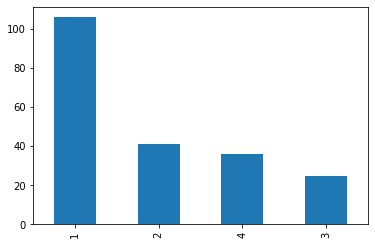

In [5]:
print(pd.value_counts(dataset['WellClass']))
pd.value_counts(dataset['WellClass']).plot.bar()


## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size= 0.2)

# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### check

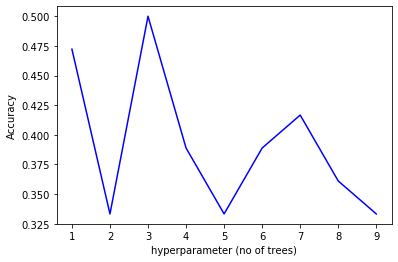

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score
from sklearn.preprocessing import StandardScaler
acc = []
for i in range(1,10):
   
        
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size= 0.2, random_state = i)
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    classifier = SVC(kernel = 'poly',C=0.1,degree = 2, gamma= 0.1)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))

plt.plot(range(1,10),acc, c = 'blue')
plt.xlabel('hyperparameter (no of trees)')
plt.ylabel('Accuracy')
plt.show()

# Training SVM

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly',C=0.1,degree = 2, gamma= 0.1)
classifier.fit(x_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Predicting Test Result

In [9]:
y_pred = classifier.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 2]
 [1 4]
 [1 3]
 [1 1]
 [1 1]
 [1 1]
 [1 4]
 [1 3]
 [1 3]
 [2 2]
 [1 3]
 [1 1]
 [1 1]
 [1 3]
 [1 2]
 [1 1]
 [1 1]
 [1 4]
 [1 1]
 [1 3]
 [1 1]
 [1 2]
 [1 1]
 [1 4]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 3]
 [1 4]
 [1 1]
 [1 1]
 [1 1]
 [1 4]
 [1 3]]


# Evaluating accuracy

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, cohen_kappa_score
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Confusion Matrix: \n')
print(cm)

print('\noverall Accuracy: {:0.2f} %'.format(accuracy_score(y_test, y_pred)*100))  
print(cr)

k= cohen_kappa_score(y_test, y_pred)
print('kappa : %0.3f'%k)

Confusion Matrix: 

[[18  0  0  0]
 [ 3  1  0  0]
 [ 8  0  0  0]
 [ 6  0  0  0]]

overall Accuracy: 52.78 %
              precision    recall  f1-score   support

           1       0.51      1.00      0.68        18
           2       1.00      0.25      0.40         4
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         6

   micro avg       0.53      0.53      0.53        36
   macro avg       0.38      0.31      0.27        36
weighted avg       0.37      0.53      0.38        36

kappa : 0.076


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Cross Validation

In [11]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X = x_train , y = y_train, cv = 10)

print('Accuracy: {:0.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:0.2f} %'.format(accuracies.std()*100))

Accuracy: 42.06 %
Standard Deviation: 4.11 %


# predicting unlabled data

In [29]:
unlabeled = pd.read_csv('Data_unlabeled.csv')

x_unl = unlabeled.iloc[: , 2:].values
x_coordinates = unlabeled.iloc[:,:2]
unlabeled.head(10)

,x,y,DFF,DFR,Altitude,Draw_D,Drain_D,LS,Lineam_D,MRVBF,...,SCA,Profile_C,Plan_C,TRI,SPI,Slope,TWI,TPI,litho_recl,geomorph_R
0,258143.343169,2.664110e+06,12.36240,8.60310,541.0,4.33529,0.16722,1.75086,0.0,0.16393,...,17.57359,-0.00098,-0.00084,2.48998,256.40796,0.12944,6.25581,0.64865,2.0,2.0
1,258233.343169,2.664110e+06,12.27924,8.59698,536.0,4.33185,0.16012,0.47551,0.0,1.84461,...,40.00359,-0.00244,-0.02385,1.00000,141.52002,0.03725,7.06296,-1.02703,2.0,2.0
2,258323.343169,2.664110e+06,12.19617,8.59179,535.0,4.32848,0.14855,0.90309,0.0,0.91355,...,36.81416,0.00071,0.00571,1.34164,225.42549,0.06861,7.31022,0.54054,2.0,2.0
3,258413.343169,2.664110e+06,12.11320,8.58755,536.0,4.32518,0.14352,1.06532,0.0,0.36503,...,17.57359,0.00220,0.01238,1.84391,113.97736,0.08951,6.68820,2.24324,2.0,2.0
4,258503.343169,2.664110e+06,12.03034,8.58425,537.0,4.32195,0.13879,0.44645,0.0,0.06206,...,22.16388,0.00089,0.00596,0.77460,36.82467,0.03725,7.46354,1.97297,4.0,2.0
5,258593.343169,2.664110e+06,11.94757,8.58189,530.0,4.31879,0.13477,1.07262,0.0,1.78328,...,45.05311,-0.00603,-0.07360,3.13050,483.79874,0.08314,6.73362,-4.02703,4.0,2.0
6,258683.343169,2.664110e+06,11.86491,8.58047,534.0,4.31569,0.13070,0.69362,0.0,0.05827,...,17.57359,0.00170,0.02702,1.34164,61.00688,0.06002,6.92963,1.56757,4.0,2.0
7,258773.343169,2.664110e+06,11.78236,8.58000,532.0,4.31266,0.12659,0.92361,0.0,0.97943,...,41.95362,-0.00221,-0.00000,1.41421,115.40007,0.06657,6.74746,-0.59459,4.0,2.0
8,258143.343169,2.664200e+06,12.32839,8.51334,535.0,4.32580,0.17574,1.00166,0.0,0.84130,...,187.56355,0.00227,-0.01712,1.48324,521.14337,0.06861,6.75585,0.35135,2.0,2.0
9,258233.343169,2.664200e+06,12.24500,8.50716,534.0,4.32241,0.17108,1.20406,0.0,0.33484,...,85.83942,0.00182,0.00387,1.89737,212.62872,0.09688,6.78160,2.32432,2.0,2.0


In [37]:
print(x_unl[0])

[ 1.24e+01  8.60e+00  5.41e+02  4.34e+00  1.67e-01  1.75e+00  0.00e+00
  1.64e-01  2.06e-01  4.00e+00  1.76e+01 -9.80e-04 -8.40e-04  2.49e+00
  2.56e+02  1.29e-01  6.26e+00  6.49e-01  2.00e+00  2.00e+00]


In [30]:
x_unl = sc.transform(x_unl)
label = classifier.predict(x_unl)
print(label[0])

1


In [31]:
x_coordinates.head()

,x,y
0,258143.343169,2.664110e+06
1,258233.343169,2.664110e+06
2,258323.343169,2.664110e+06
3,258413.343169,2.664110e+06
4,258503.343169,2.664110e+06


In [32]:
x_coordinates['well_yield'] = label

x_coordinates.head()
x_coordinates.describe()

C:\Users\Bihari\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,x,y,well_yield
count,2.050623e+06,2.050623e+06,2.050623e+06
mean,2.785837e+05,2.769838e+06,1.161304e+00
std,3.924501e+04,4.121798e+04,4.707467e-01
min,1.901933e+05,2.664110e+06,1.000000e+00
25%,2.483333e+05,2.739260e+06,1.000000e+00
50%,2.789333e+05,2.768240e+06,1.000000e+00
75%,3.118733e+05,2.798570e+06,1.000000e+00
max,3.552533e+05,2.862470e+06,4.000000e+00


1    1801739
2     173606
3      68666
4       6612
Name: well_yield, dtype: int64


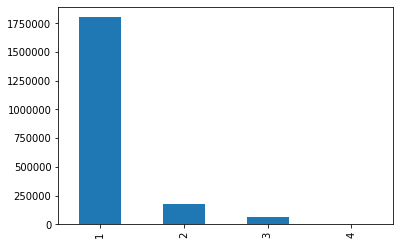

In [33]:
print(pd.value_counts(x_coordinates['well_yield']))
pd.value_counts(x_coordinates['well_yield']).plot.bar()

In [34]:
#exporting the data
x_coordinates.to_csv('prediction_SVC_raw.csv')

# Grid search

In [19]:
from sklearn.model_selection import GridSearchCV
kernels = ['linear','poly','rbf','sigmoid','precomputed']
cs = list(np.arange(0.01,1,0.01))
degrees  = list(np.arange(1,4,1))
gammas = list(np.arange(0.01,1,0.05))

parameters = [{'kernel':['poly'],'C':cs,'degree':degrees,'gamma':gammas}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 44.76 %
Best Parameters: {'C': 0.01, 'degree': 2, 'gamma': 0.41000000000000003, 'kernel': 'poly'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [22]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X = x_train , y = y_train, cv = 10)

print('Accuracy: {:0.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:0.2f} %'.format(accuracies.std()*100))

Accuracy: 99.51 %
Standard Deviation: 0.30 %


In [278]:
list(np.arange(1,5))

[1, 2, 3, 4]